## Feature  Engineering with titanic dataset: Building and compare models with different features with 5-fold cross-validation (GridSearchCV)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Read the dataset from the data folder
import pandas as pd

titanic = pd.read_csv('gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#titanic_data = titanic.drop(['boat', 'body', 'home.dest'], axis = 1)
#titanic_data = titanic_data[['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']]
#titanic_data.head()

In [ ]:
# Check the number of rows and column in the data

titanic.shape

(891, 12)

In [ ]:
# Check the types of data stored in each column

titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# See the disribution of the target variable

titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Explore continuous features

In [ ]:
# Drop all categorical features

cat_features = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

titanic.drop(cat_features, axis = 1, inplace=True)

titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
#Look at the distribution of these features

titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Look at the correlation matric

titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
#Look at the fare by different passenger class level

titanic.groupby('Pclass')['Fare'].describe().transpose()

Pclass,1,2,3
count,216.000000,184.000000,491.000000
mean,84.154687,20.662183,13.675550
std,78.380373,13.417399,11.778142
min,0.000000,0.000000,0.000000
25%,30.923950,13.000000,7.750000
50%,60.287500,14.250000,8.050000
75%,93.500000,26.000000,15.500000
max,512.329200,73.500000,69.550000


In [ ]:
from scipy import stats

def describe_cont_features(feature):
    print('\n*** Result for {} ***'.format(feature))
    print(titanic.groupby('Survived')[feature].describe())
    print(ttest(feature))

def ttest(feature):
    survived = titanic[titanic['Survived']==1][feature]
    not_survived = titanic[titanic['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var = False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [ ]:
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_features(feature)


*** Result for Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, p-value: 2.91e-23
None

*** Result for Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p-value: nan
None

*** Result for SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, p-value: 0.233
None

*** Result for Parch ***
          count    

In [ ]:
#Look at the average value of each feature based on whether age is missing

titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


## Plot continous features

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [ ]:
titanic = pd.read_csv('gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics.csv', 
                      usecols=['Survived',	'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


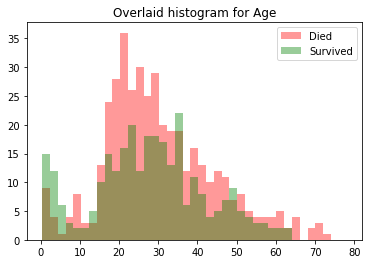

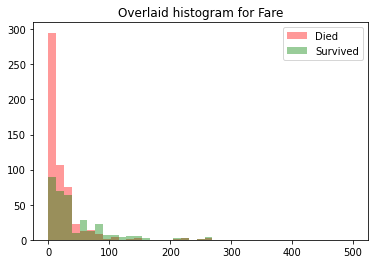

In [ ]:
# Plot overlaid histogram for continous features

for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color = 'r', kde = False, bins = np.arange(xmin, xmax, width))
    sns.distplot(survived, color = 'g', kde = False, bins = np.arange(xmin, xmax, width))
    plt.legend(['Died', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

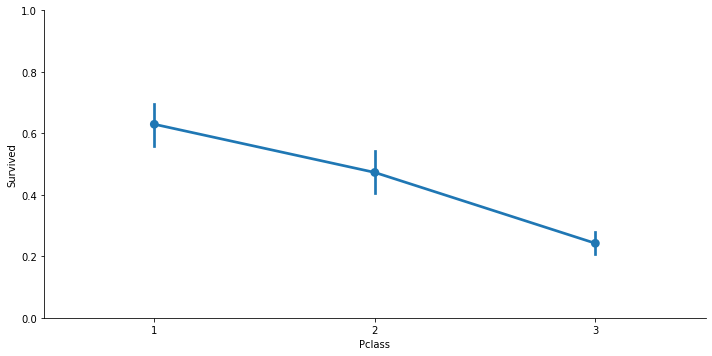

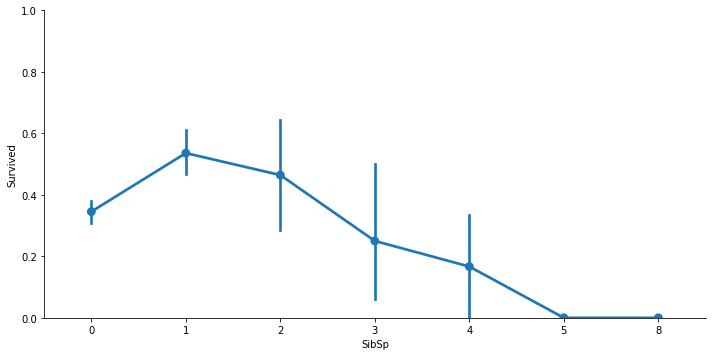

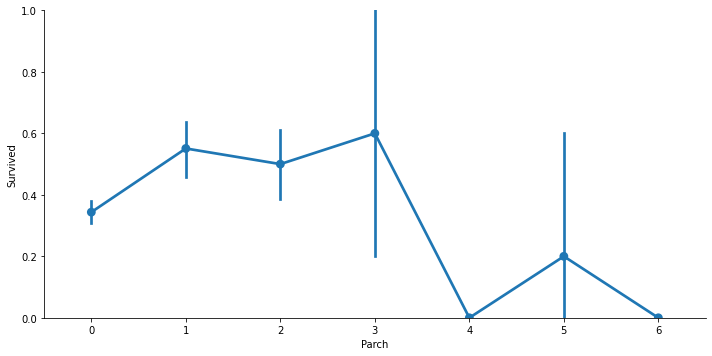

In [ ]:
# Generate categorical plots for ordinal features

for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x = col, y = 'Survived', data = titanic, kind='point', aspect=2)
    plt.ylim(0, 1)

(0.0, 1.0)

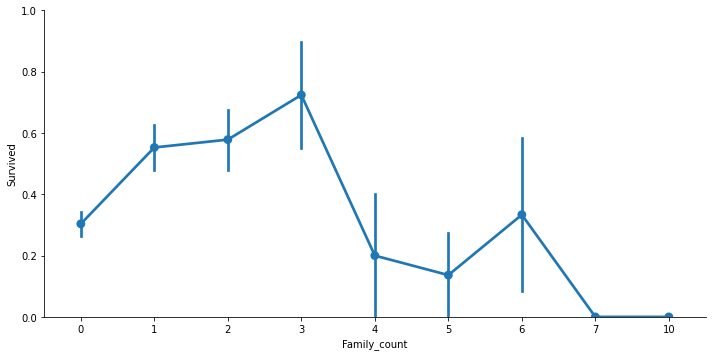

In [ ]:
# Create a new family count feature

titanic['Family_count'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x = 'Family_count', y = 'Survived', data = titanic, kind='point', aspect=2)
plt.ylim(0, 1)

## Explore categorical features

In [ ]:
# Read the dataset

titanic = pd.read_csv('gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#titanic = titanic.drop(['boat', 'body', 'home.dest'], axis = 1)

In [ ]:
# Drop all continous features

cont_features = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

titanic.drop(cont_features, axis = 1, inplace=True)

titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [ ]:
# Check if there are any missing values

titanic.isnull().sum()

Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Explore the number of unique values for each faeture

for col in titanic.columns:
    print('{}; {} unique values'.format(col, titanic[col].nunique()))

Survived; 2 unique values
Name; 891 unique values
Sex; 2 unique values
Ticket; 681 unique values
Cabin; 147 unique values
Embarked; 3 unique values


In [ ]:
# Check survival rate by gender

titanic.groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
# Check survival rate by the port departed from

titanic.groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
# Is Cabin missing at random

titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [ ]:
# Look at the unique values for the ticket feature
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
# Create a title faeture by parsing passenger name

titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr


In [ ]:
# Look at survival rateby title
titanic.pivot_table('Survived', index = ['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

## Plot categorical features

In [ ]:
titanic = pd.read_csv('gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics.csv', 
                      usecols=['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [ ]:
# Create a title feature by parsing passenger name and Create a carbin indicator variable

titanic['Title_Raw'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic['Title'] = titanic['Title_Raw'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Others')
                                                                   

titanic['Cabin_Ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title_Raw,Title,Cabin_Ind
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss,Miss,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs,Mrs,1
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr,Mr,0


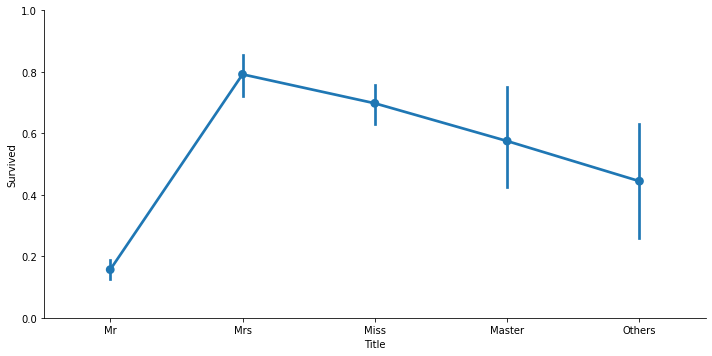

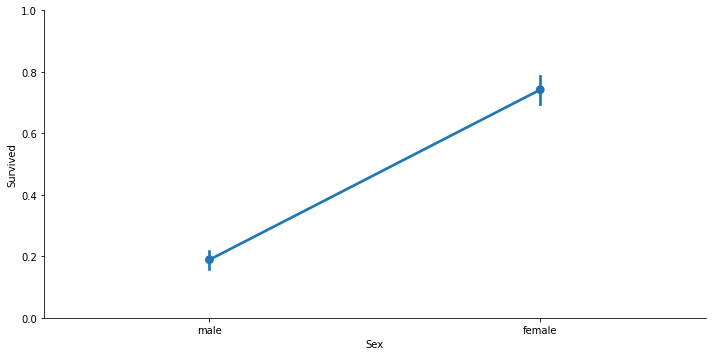

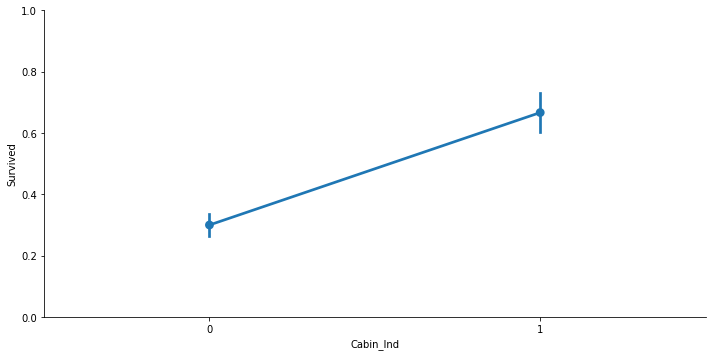

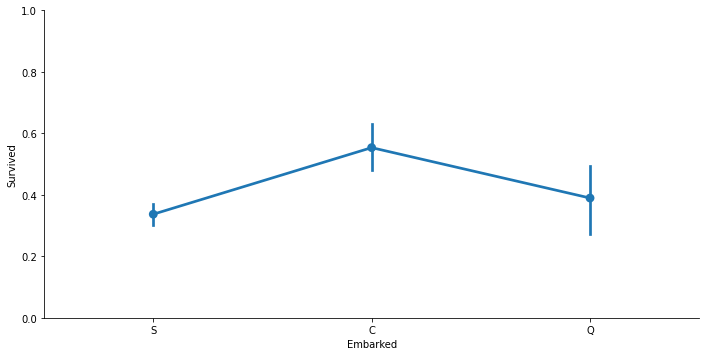

In [ ]:
# Generate categorical plots for categorical features

for col in ['Title', 'Sex', 'Cabin_Ind', 'Embarked']:
    sns.catplot(x = col, y = 'Survived', data = titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)


In [ ]:
# Look at survival rateby title
titanic.pivot_table('Survived', index = ['Cabin_Ind'], columns = 'Embarked', aggfunc=['count'])

count         
Embarked      C   Q    S
Cabin_Ind               
0            99  73  515
1            69   4  129

## Key takeaways for each of the 10 features

#### 1. Name on its own was not very valuable. However, the title that is stored is part of that name might be a proxy status and is likely related to whether they survive or not. Title is likely a more useful feature.

#### 2. Passenger Class, Age and Sex are remain as they were in the data. Sex is correlated with title and fare is correlated with Passenger Class; just to keep in mind as we move forward.

#### 3. Number of sibling&Spouse (SibSp) and number of parents and children (Parch) onboard were telling a similar story. So they are combined into one feature; Family_counts.

#### 4. Ticket number wasmore or less random, not really any signal in that fearture.

#### 5. Fare is kept as it is, but again, keep in mind it is correlated with Pclass.

#### 6. Cabin was missing for more than 75% of the passengers. It could have been assummed it was missing at random, and in that case, the feature would have just probably dropped beacuse it wouldn't be providing much value. However, it was uncovered that there was a strong correlation between whether tha cabin was missing and survival rate. So cabin was converted from categorical feature with likely very little value to simple binary indicator  that seems to be a very powerful predicator of whether a passenger survived.

#### 7. There is correlation between the port from where passengers embarked and their likehood of surviving. It is not a likely a causal factor. It is likely correlated with some other feature and other feature is probably the driving factor, which might likely be true of the carbin indicator.


## Creating and cleaning features: Treating missing values in the data

### Three primary method to treat missing values

#### 1. Impute to the median or mean of the feature
#### 2. Model that feature to predict the missing values
#### 3.Assign it some default values(other or -999)

In [ ]:
# Read the dataset

titanic = pd.read_csv('gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check where we have missing values
## There are missing values for Age, Cabin and Embarked

titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Lets set aside cabin for now, it gonna be address that a little later because it is missing at random. Lets look at filling missing values for age and embarked.

### Filling missing values for Age

In [ ]:
# Check if Age is appear to be missing at random

titanic.groupby(titanic['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


#### The age is treated as missing at random, and use one of the most naive but useful methods for filling missing values. Replacing the missing values with the average value of that feature.
#### This satisfies the model by manking sure we have a value in there but by replacing it with the average value, it is not biasing the model towards one outcome or another, beacuse the age value will just be average, it will rely on the other features to try to indicate whether the given person survived or not

In [ ]:
# Fill in missing values for Age feature

titanic['Age_clean'] = titanic['Age'].fillna(titanic['Age'].mean())

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_clean        0
dtype: int64

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.000000


In [ ]:
# Fill in missing values for Embarked feature

titanic['Embarked_clean'] = titanic['Embarked'].fillna('O')
titanic.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_clean           0
Embarked_clean      0
dtype: int64

In [ ]:
# write out data with missing values cleaned up

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = '/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_no_missing.csv'
with open(path, 'w', encoding = 'utf-8-sig', ) as f:
  titanic.to_csv(f, index = False)

Mounted at /content/gdrive


## Creating and cleaning features: Cap and floor data to remove outliers

In [ ]:
# Read the data
titanic = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_no_missing.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S


In [ ]:
# See where outliers might be an issues

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [ ]:
def detect_outlier(feature):
    outliers = []
    data = titanic[feature]
    mean = np.mean(data)
    std = np.std(data)

    for y in data:
        z_score = (y - mean)/std
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('    --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95), len([i for i in data if i > data.quantile(.95)])))
    print('    --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('    --3sd: {:.1f} / {} values exceed that'.format(data.quantile(.99), len([i for i in data if i > data.quantile(.99)])))

In [ ]:
# Determine what the upperbound should be for continous features

for feature in ['Age_clean', 'SibSp', 'Parch', 'Fare']:
    detect_outlier(feature)


Outlier caps for Age_clean:
    --95p: 54.0 / 42 values exceed that
    --3sd: 68.7 / 7 values exceed that
    --3sd: 65.0 / 8 values exceed that

Outlier caps for SibSp:
    --95p: 3.0 / 30 values exceed that
    --3sd: 3.8 / 30 values exceed that
    --3sd: 5.0 / 7 values exceed that

Outlier caps for Parch:
    --95p: 2.0 / 15 values exceed that
    --3sd: 2.8 / 15 values exceed that
    --3sd: 4.0 / 6 values exceed that

Outlier caps for Fare:
    --95p: 112.1 / 45 values exceed that
    --3sd: 181.2 / 20 values exceed that
    --3sd: 249.0 / 9 values exceed that


#### Outliers for Age clean and Fare

In [ ]:
# Cap features
titanic['Age_clean'].clip(upper = titanic['Age_clean'].quantile(.99), inplace=True)
titanic['Fare_clean'] = titanic['Fare'].clip(upper = titanic['Fare'].quantile(.99))

In [ ]:
# Decribe the dataframe again to make sure the capping was successful
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.640195,31.224767
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,65.000000,249.006220


In [ ]:
# write out data with capped features

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = '/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_capped.csv'
with open(path, 'w', encoding = 'utf-8-sig', ) as f:
  titanic.to_csv(f, index = False)

Mounted at /content/gdrive


## Creating and cleaning feature: Transform skewed features

In [ ]:
#Read the data
from statsmodels.graphics.gofplots import qqplot

titanic = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_capped.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


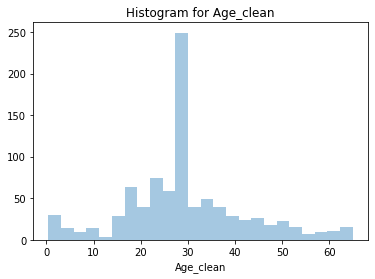

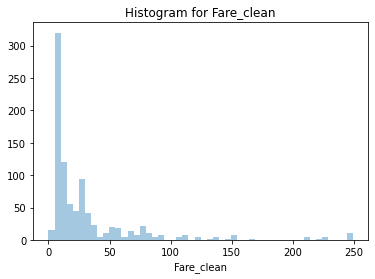

In [ ]:
# Plot histogram for each continuous feature to see if a transformation is necessary

for feature in ['Age_clean', 'Fare_clean']:
    sns.distplot(titanic[feature], kde = False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

## Transformation is a process that alters each data point in a certain feature in a systematic way that makes it cleaner for the model to use.

### Box-Cox Power Transformation
#### Process
1. Determine what range of exponent to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best transformation

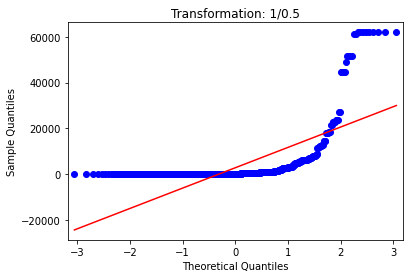

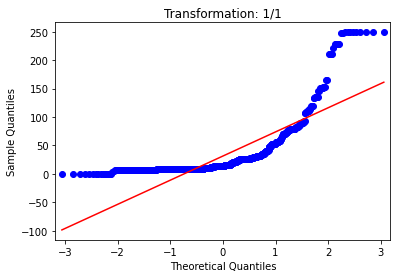

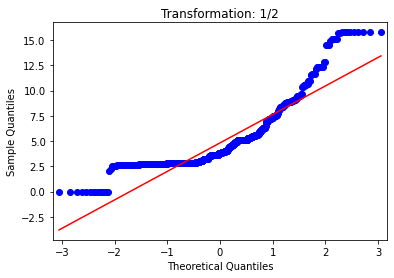

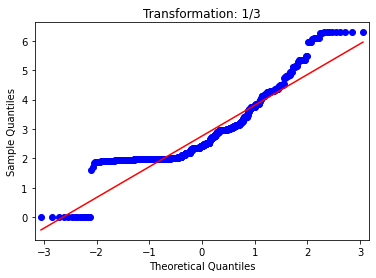

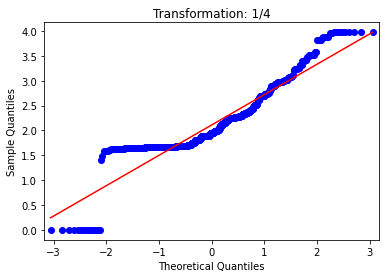

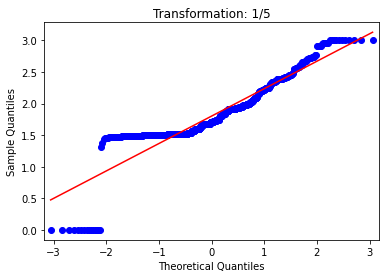

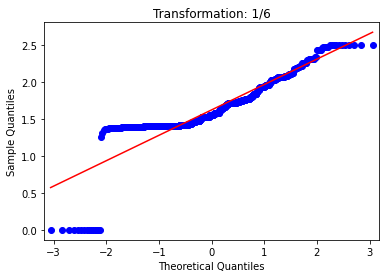

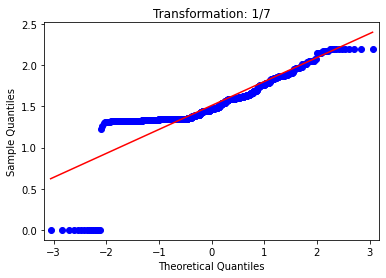

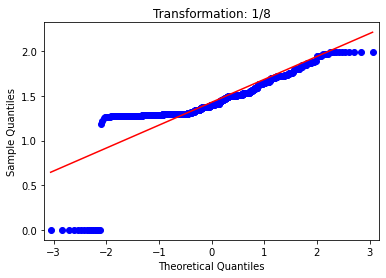

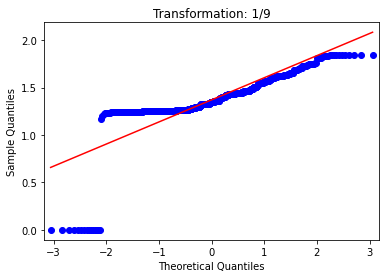

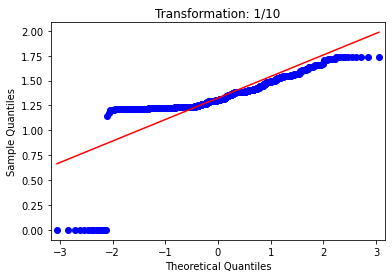

In [ ]:
# Generate QQ plot

for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = titanic['Fare_clean']**(1/i)
    qqplot(data_t, line='s')
    plt.title('Transformation: 1/{}'.format(str(i)))

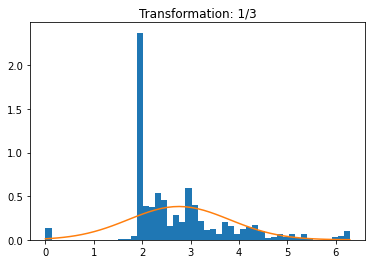

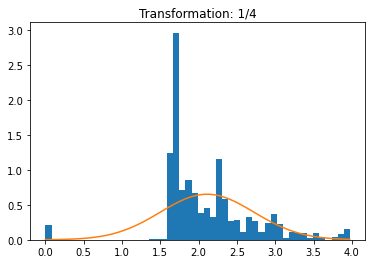

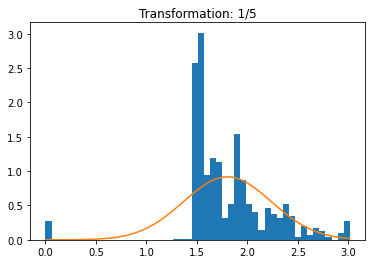

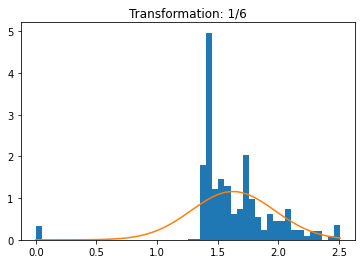

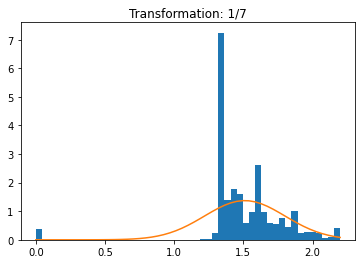

In [ ]:
# Box-Cox transformation
import scipy.stats

for i in [3, 4, 5, 6, 7]:
    data_t = titanic['Fare_clean']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density = True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title('Transformation: 1/{}'.format(str(i)))
    plt.show()

In [ ]:
# Create the number transform feature

titanic['Fare_clean_tr'] = titanic['Fare_clean'].apply(lambda x: x**(1/5))

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


In [ ]:
# Create new CSV file with the updated data

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = '/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_transformed.csv'
with open(path, 'w', encoding = 'utf-8-sig', ) as f:
  titanic.to_csv(f, index = False)

Mounted at /content/gdrive


## Creating and leaning features: Create new features from text

In [ ]:
# Read the data

titanic = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_transformed.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


## Create new features

In [ ]:
# Create title feature

titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss


In [ ]:
# Look at survival rate by title 

titanic.pivot_table('Survived', index = ['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

In [ ]:
# Create new CSV file with the updated data

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = '/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_title.csv'
with open(path, 'w', encoding = 'utf-8-sig', ) as f:
  titanic.to_csv(f, index = False)

Mounted at /content/gdrive


## Creating and cleaning features: Create indicator

#### 75% cabin feature is missing. However, on a deeper analysis, there was strong correlation between survival rate and whether the cabin feature is missing or not. Therefore, there is a need to make it very clear to the model whether this passenger had a carbin number or not. We can do that by creating a simple binary indicator variable.

In [ ]:
titanic = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_title.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr


### Create indicator variable for carbin

In [ ]:
# What would an indicator variable for Cabin look like?

titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [ ]:
# Create

titanic['Cabin_Ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_Ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0


In [ ]:
# Create new CSV file with the updated data

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = '/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_cabin_ind.csv'
with open(path, 'w', encoding = 'utf-8-sig', ) as f:
  titanic.to_csv(f, index = False)

Mounted at /content/gdrive


## Creating and cleaning features: Combine exixting features into new feature

In [ ]:
# Read the data

titanic = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_cabin_ind.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_Ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0


## Combine SibSp & Parch into new Family_Count feature

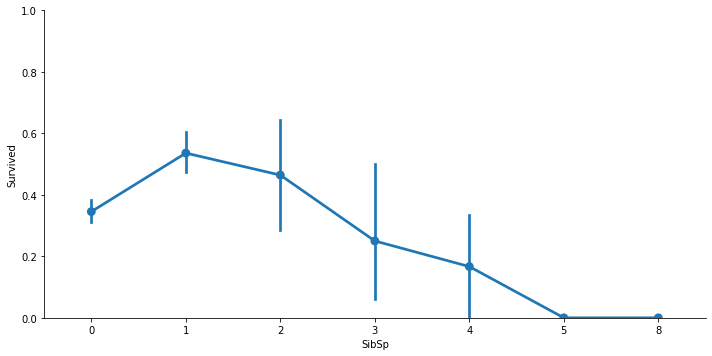

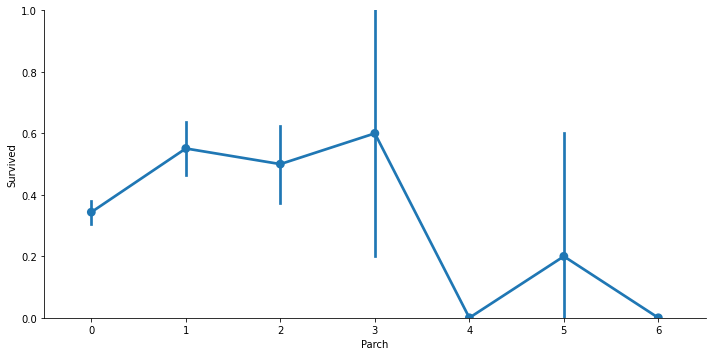

In [ ]:
# General categorical plots for ordinal features

for col in ['SibSp', 'Parch']:
    sns.catplot(x=col, y = 'Survived', data = titanic, kind='point', aspect=2)
    plt.ylim(0, 1)

(0.0, 1.0)

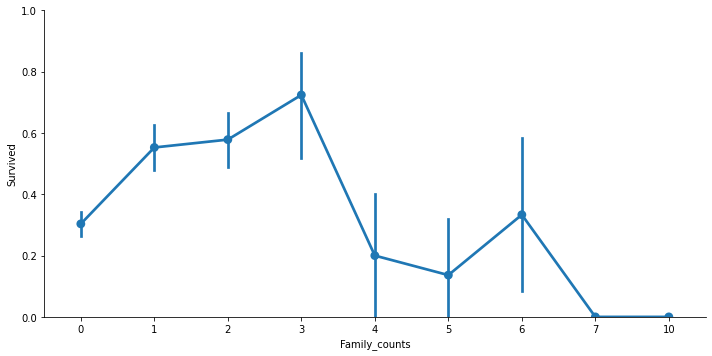

In [ ]:
# Create a new family count feature

titanic['Family_counts'] = titanic['SibSp'] + titanic['Parch']

sns.catplot(x='Family_counts', y = 'Survived', data = titanic, kind='point', aspect=2)
plt.ylim(0, 1)

In [ ]:
# Create new CSV file with the updated data

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = '/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_family_counts.csv'
with open(path, 'w', encoding = 'utf-8-sig', ) as f:
  titanic.to_csv(f, index = False)

Mounted at /content/gdrive


## Creating and cleaning features: Convert categorical features to numeric


In [ ]:
from sklearn.preprocessing import LabelEncoder

titanic = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_family_counts.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_Ind,Family_counts
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0,0


In [ ]:
# Convert categorical features to numeric levels

for feature in ['Sex', 'Cabin', 'Embarked', 'Embarked_clean', 'Title']:
    le = LabelEncoder()
    titanic[feature] = le.fit_transform(titanic[feature].astype(str))

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_Ind,Family_counts
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


In [ ]:
# Create new CSV file with the updated data

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

path = '/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_numeric.csv'
with open(path, 'w', encoding = 'utf-8-sig', ) as f:
  titanic.to_csv(f, index = False)

Mounted at /content/gdrive


## Prepare features for modelling: Create training and test set

In [ ]:
# Read the data
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/titanics_numeric.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_Ind,Family_counts
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


Split into train(60%), validation(20) and test(20%) sets

In [ ]:
features = titanic.drop(['PassengerId', 'Ticket', 'Name', 'Survived'], axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_Ind,Family_counts
570,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
787,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
74,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
113,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
635,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


In [ ]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/ len(labels), 2))

0.6
0.2
0.2


## Write out all data

In [ ]:
X_train.to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_features.csv', index = False)
X_val.to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_features.csv', index = False)
X_test.to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/test_features.csv', index = False)

y_train.to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_labels.csv', index = False)
y_val.to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_labels.csv', index = False) 
y_test.to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/test_labels.csv', index = False)

## Prepare features for modelling: Standardize all features

In [ ]:
# Read in data

from sklearn.preprocessing import StandardScaler

titanic_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_features.csv')
titanic_val = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_features.csv')
titanic_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/test_features.csv')

titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_Ind,Family_counts
0,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
1,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
2,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
3,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
4,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


### Standardize features

In [ ]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(titanic_train)

StandardScaler()

In [ ]:
# Scale the training, test and validation sets

features = titanic_train.columns

titanic_train[features] = scaler.transform(titanic_train[features])
titanic_val[features] = scaler.transform(titanic_val[features])
titanic_test[features] = scaler.transform(titanic_test[features])

titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_Ind,Family_counts
0,-0.408652,0.737125,2.258185,-0.464063,-0.468427,-0.412724,0.450064,0.573494,2.570771,0.545364,-0.483840,-0.446199,0.430223,-0.544166,-0.540385
1,0.803682,0.737125,-1.469145,2.692745,0.794906,-0.066661,0.450064,-0.718682,-1.673694,-0.334468,-0.046993,0.373863,-1.784129,-0.544166,2.277639
2,0.803682,0.737125,0.187446,-0.464063,-0.468427,0.441904,0.450064,0.573494,0.212735,0.545364,0.594986,1.003414,0.430223,-0.544166,-0.540385
3,0.803682,-1.356623,-0.640849,0.325139,-0.468427,-0.425266,0.450064,0.573494,-0.730480,0.545364,-0.499672,-0.494025,-1.230541,-0.544166,0.023220
4,-0.408652,-1.356623,-0.088652,-0.464063,-0.468427,-0.366273,0.450064,0.573494,-0.101670,0.545364,-0.425203,-0.288093,-1.230541,-0.544166,-0.540385


## Write out all final dataset

In [ ]:
# Read in data
titanic_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_features.csv')
titanic_val = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_features.csv')
titanic_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/test_features.csv')

titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_Ind,Family_counts
0,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
1,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
2,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
3,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
4,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


In [ ]:
#Define the list of features to be used for each dataset

raw_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

cleaned_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean', 'Cabin', 'Embarked_clean']

all_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean', 'Fare_clean_tr', 'Cabin', 'Cabin_Ind',
                'Embarked_clean', 'Title', 'Family_counts']

reduced_features = ['Pclass', 'Sex', 'Age_clean', 'Family_counts', 'Fare_clean_tr', 'Cabin_Ind', 'Title']

Write out all data

In [ ]:
titanic_train[raw_original_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_features_raw.csv', 
                                            index = False)
titanic_val[raw_original_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_features_raw.csv', 
                                          index = False)
titanic_test[raw_original_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/test_features_raw.csv', 
                                           index = False)

titanic_train[cleaned_original_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_features_cleaned.csv', 
                                                index = False)
titanic_val[cleaned_original_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_features_cleaned.csv', 
                                              index = False)
titanic_test[cleaned_original_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/test_features_cleaned.csv', 
                                               index = False)

titanic_train[all_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_features_all.csv', 
                                   index = False)
titanic_val[all_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_features_all.csv', 
                                 index = False)
titanic_test[all_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/test_features_all.csv', 
                                  index = False)

titanic_train[reduced_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_features_reduced.csv', 
                                       index = False)
titanic_val[reduced_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_features_reduced.csv', 
                                     index = False)
titanic_test[reduced_features].to_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/test_features_reduced.csv', 
                                      index = False)

## Move labesls to proper directory

In [ ]:
# Read in all labels
titanic_train_labels = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_labels.csv')
titanic_val_labels = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_labels.csv') 
titanic_test_labels = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/test_labels.csv')

titanic_train_labels 

,Survived
0,1
1,0
2,1
3,0
4,1
...,...
529,1
530,0
531,0
532,1


## Conpare all features
1. Run 5-fold cross-validation and select the best models for each of the four feature sets.
2. Evaluate those models on the validation sets and pick the best one based on the performance.
3. Evaluate the best model on the test set to gauge the ability to generalise to unseen data.

## Evalution metrics
#### The model will be evaluated with three most common evaluation metrics for classification problems; accuracy, precision and recall.


### Build model  with raw original features

#### Read in data and import libraries

In [ ]:
# Import libraries  & Read in data

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

train_features = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_features_raw.csv')
train_labels = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,2,1,62.0,0,0,10.5000,147,2
1,3,1,8.0,4,1,29.1250,147,1
2,3,1,32.0,0,0,56.4958,147,2
3,3,0,20.0,1,0,9.8250,147,2
4,2,0,28.0,0,0,13.0000,147,2


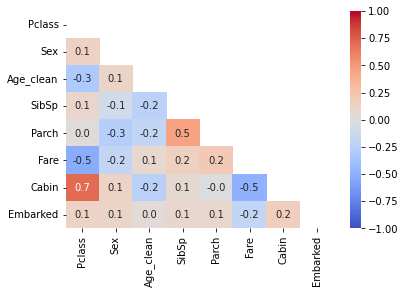

In [ ]:
## Generate correlation matrix heat map

matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin= -1, vmax=1, center=0, cmap='coolwarm', mask= matrix)

## GridSearchCV

In [ ]:
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Conduct search for best params while runnin cross-validation (GridSearchCV)

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [ 2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv = 5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

Best Parameters: {'max_depth': 8, 'n_estimators': 128}

0.768 (+/-0.156) for {'max_depth': 2, 'n_estimators': 8}
0.802 (+/-0.09) for {'max_depth': 2, 'n_estimators': 16}
0.798 (+/-0.09) for {'max_depth': 2, 'n_estimators': 32}
0.792 (+/-0.103) for {'max_depth': 2, 'n_estimators': 64}
0.802 (+/-0.109) for {'max_depth': 2, 'n_estimators': 128}
0.792 (+/-0.098) for {'max_depth': 2, 'n_estimators': 256}
0.796 (+/-0.106) for {'max_depth': 2, 'n_estimators': 512}
0.811 (+/-0.095) for {'max_depth': 4, 'n_estimators': 8}
0.811 (+/-0.103) for {'max_depth': 4, 'n_estimators': 16}
0.817 (+/-0.084) for {'max_depth': 4, 'n_estimators': 32}
0.822 (+/-0.112) for {'max_depth': 4, 'n_estimators': 64}
0.815 (+/-0.115) for {'max_depth': 4, 'n_estimators': 128}
0.815 (+/-0.115) for {'max_depth': 4, 'n_estimators': 256}
0.824 (+/-0.106) for {'max_depth': 4, 'n_estimators': 512}
0.811 (+/-0.047) for {'max_depth': 8, 'n_estimators': 8}
0.824 (+/-0.066) for {'max_depth': 8, 'n_estimators': 16}
0.832 (+/-0.075

## Feature importance

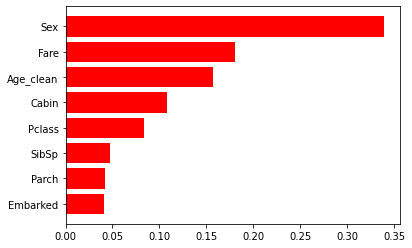

In [ ]:
# Genarate feature importance plot

feature_importance = cv.best_estimator_.feature_importances_
indices = np.argsort(feature_importance)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feature_importance[indices], color = 'r', align = 'center')
plt.show()

## Write out pickled model

In [ ]:
joblib.dump(cv.best_estimator_, '/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/model_raw_original_features.pkl')

['/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/model_raw_original_features.pkl']

## Build model with cleaned original features

In [ ]:
train_features = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_features_cleaned.csv')
train_labels = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Cabin,Embarked_clean
0,2,1,62.0,0,0,10.5000,147,3
1,3,1,8.0,4,1,29.1250,147,2
2,3,1,32.0,0,0,56.4958,147,3
3,3,0,20.0,1,0,9.8250,147,3
4,2,0,28.0,0,0,13.0000,147,3


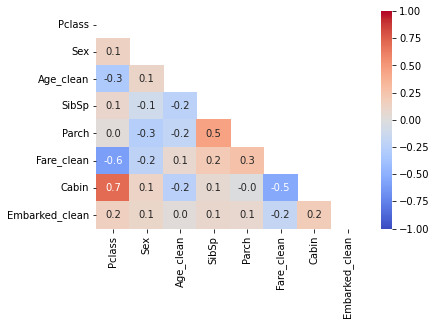

In [ ]:
## Generate correlation matrix heat map

matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin= -1, vmax=1, center=0, cmap='coolwarm', mask= matrix)

## GridSearchCV

In [ ]:
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Conduct search for best params while runnin cross-validation (GridSearchCV)

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [ 2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv = 5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

Best Parameters: {'max_depth': 8, 'n_estimators': 128}

0.802 (+/-0.107) for {'max_depth': 2, 'n_estimators': 8}
0.783 (+/-0.102) for {'max_depth': 2, 'n_estimators': 16}
0.8 (+/-0.097) for {'max_depth': 2, 'n_estimators': 32}
0.803 (+/-0.09) for {'max_depth': 2, 'n_estimators': 64}
0.792 (+/-0.112) for {'max_depth': 2, 'n_estimators': 128}
0.788 (+/-0.11) for {'max_depth': 2, 'n_estimators': 256}
0.796 (+/-0.101) for {'max_depth': 2, 'n_estimators': 512}
0.796 (+/-0.114) for {'max_depth': 4, 'n_estimators': 8}
0.822 (+/-0.114) for {'max_depth': 4, 'n_estimators': 16}
0.82 (+/-0.098) for {'max_depth': 4, 'n_estimators': 32}
0.824 (+/-0.096) for {'max_depth': 4, 'n_estimators': 64}
0.807 (+/-0.115) for {'max_depth': 4, 'n_estimators': 128}
0.832 (+/-0.099) for {'max_depth': 4, 'n_estimators': 256}
0.824 (+/-0.106) for {'max_depth': 4, 'n_estimators': 512}
0.828 (+/-0.049) for {'max_depth': 8, 'n_estimators': 8}
0.843 (+/-0.043) for {'max_depth': 8, 'n_estimators': 16}
0.841 (+/-0.063) f

## Feature Importance

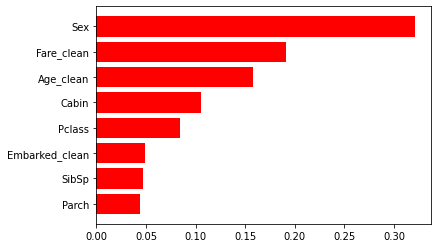

In [ ]:
# Genarate feature importance plot

feature_importance = cv.best_estimator_.feature_importances_
indices = np.argsort(feature_importance)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feature_importance[indices], color = 'r', align = 'center')
plt.show()

## Write out pickled model

In [ ]:
joblib.dump(cv.best_estimator_, '/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/model_cleaned_original_features.pkl')

['/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/model_cleaned_original_features.pkl']

## Build model with all features {cleaned version of the raw data and new data created}

In [ ]:
train_features = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_features_all.csv')
train_labels = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Fare_clean_tr,Cabin,Cabin_Ind,Embarked_clean,Title,Family_counts
0,2,1,62.0,0,0,10.5000,1.600434,147,0,3,11,0
1,3,1,8.0,4,1,29.1250,1.962697,147,0,2,7,5
2,3,1,32.0,0,0,56.4958,2.240801,147,0,3,11,0
3,3,0,20.0,1,0,9.8250,1.579307,147,0,3,8,1
4,2,0,28.0,0,0,13.0000,1.670278,147,0,3,8,0


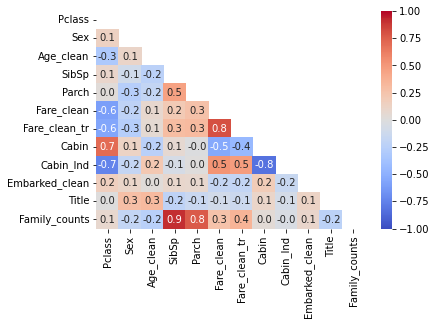

In [ ]:
## Generate correlation matrix heat map

matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin= -1, vmax=1, center=0, cmap='coolwarm', mask= matrix)

## GridsearchCV

In [ ]:
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Conduct search for best params while runnin cross-validation (GridSearchCV)

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [ 2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv = 5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

Best Parameters: {'max_depth': 8, 'n_estimators': 64}

0.781 (+/-0.114) for {'max_depth': 2, 'n_estimators': 8}
0.798 (+/-0.094) for {'max_depth': 2, 'n_estimators': 16}
0.77 (+/-0.139) for {'max_depth': 2, 'n_estimators': 32}
0.792 (+/-0.096) for {'max_depth': 2, 'n_estimators': 64}
0.794 (+/-0.123) for {'max_depth': 2, 'n_estimators': 128}
0.781 (+/-0.107) for {'max_depth': 2, 'n_estimators': 256}
0.787 (+/-0.121) for {'max_depth': 2, 'n_estimators': 512}
0.787 (+/-0.115) for {'max_depth': 4, 'n_estimators': 8}
0.811 (+/-0.076) for {'max_depth': 4, 'n_estimators': 16}
0.833 (+/-0.08) for {'max_depth': 4, 'n_estimators': 32}
0.817 (+/-0.113) for {'max_depth': 4, 'n_estimators': 64}
0.828 (+/-0.071) for {'max_depth': 4, 'n_estimators': 128}
0.826 (+/-0.088) for {'max_depth': 4, 'n_estimators': 256}
0.826 (+/-0.085) for {'max_depth': 4, 'n_estimators': 512}
0.833 (+/-0.058) for {'max_depth': 8, 'n_estimators': 8}
0.809 (+/-0.083) for {'max_depth': 8, 'n_estimators': 16}
0.822 (+/-0.053)

## Feature Importance

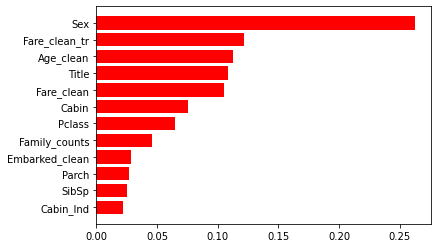

In [ ]:
# Genarate feature importance plot

feature_importance = cv.best_estimator_.feature_importances_
indices = np.argsort(feature_importance)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feature_importance[indices], color = 'r', align = 'center')
plt.show()

## Write out pickled model

In [ ]:
joblib.dump(cv.best_estimator_, '/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/model_all_features.pkl')

['/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/model_all_features.pkl']

## Build model with reduced features

In [ ]:
train_features = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_features_reduced.csv')
train_labels = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,Family_counts,Fare_clean_tr,Cabin_Ind,Title
0,2,1,62.0,0,1.600434,0,11
1,3,1,8.0,5,1.962697,0,7
2,3,1,32.0,0,2.240801,0,11
3,3,0,20.0,1,1.579307,0,8
4,2,0,28.0,0,1.670278,0,8


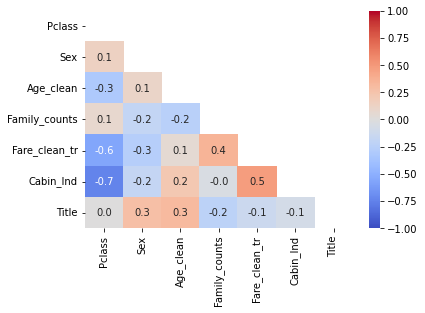

In [ ]:
## Generate correlation matrix heat map

matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin= -1, vmax=1, center=0, cmap='coolwarm', mask= matrix)

## GridSearchCV

In [ ]:
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
# Conduct search for best params while runnin cross-validation (GridSearchCV)

rf = RandomForestClassifier()
parameters = {
    'n_estimators': [ 2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv = 5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

Best Parameters: {'max_depth': 4, 'n_estimators': 32}

0.79 (+/-0.122) for {'max_depth': 2, 'n_estimators': 8}
0.787 (+/-0.117) for {'max_depth': 2, 'n_estimators': 16}
0.798 (+/-0.113) for {'max_depth': 2, 'n_estimators': 32}
0.79 (+/-0.125) for {'max_depth': 2, 'n_estimators': 64}
0.79 (+/-0.131) for {'max_depth': 2, 'n_estimators': 128}
0.789 (+/-0.116) for {'max_depth': 2, 'n_estimators': 256}
0.783 (+/-0.121) for {'max_depth': 2, 'n_estimators': 512}
0.809 (+/-0.111) for {'max_depth': 4, 'n_estimators': 8}
0.811 (+/-0.102) for {'max_depth': 4, 'n_estimators': 16}
0.826 (+/-0.1) for {'max_depth': 4, 'n_estimators': 32}
0.82 (+/-0.092) for {'max_depth': 4, 'n_estimators': 64}
0.818 (+/-0.1) for {'max_depth': 4, 'n_estimators': 128}
0.815 (+/-0.109) for {'max_depth': 4, 'n_estimators': 256}
0.813 (+/-0.105) for {'max_depth': 4, 'n_estimators': 512}
0.818 (+/-0.049) for {'max_depth': 8, 'n_estimators': 8}
0.817 (+/-0.085) for {'max_depth': 8, 'n_estimators': 16}
0.815 (+/-0.075) for {

## Feature importance

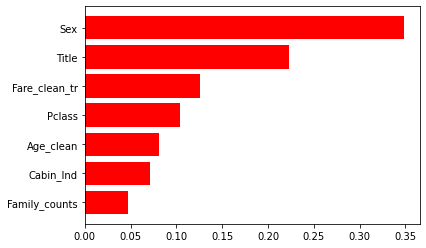

In [ ]:
# Genarate feature importance plot

feature_importance = cv.best_estimator_.feature_importances_
indices = np.argsort(feature_importance)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feature_importance[indices], color = 'r', align = 'center')
plt.show()

Write out pickled model

In [ ]:
joblib.dump(cv.best_estimator_, '/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/model_reduced_features.pkl')

['/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/model_reduced_features.pkl']

## Compare and evaluate all the models
1. Eavluate all our saved models on the validation sets
2. Select the best model based on performance
3. Evaluate that model on the holdout test set

In [ ]:
# Read in data

val_features_raw = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_features_raw.csv')
val_features_cleaned = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_features_cleaned.csv')
val_features_all = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_features_all.csv')
val_features_reduced = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_features_reduced.csv')

val_labels = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/validation_labels.csv')

val_features_raw.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,29.699118,1,0,89.1042,86,0
1,1,1,45.500000,0,0,28.5000,56,2
2,3,1,29.699118,0,0,7.7500,147,1
3,2,0,24.000000,1,0,26.0000,147,2
4,2,1,36.000000,0,0,12.8750,90,0


## Read in models

In [ ]:
# Read in models

models = {}

for model in ['raw_original', 'cleaned_original', 'all', 'reduced']:
    models[model] = joblib.load('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/model_{}_features.pkl'.format(model))

## Evaluate model on validation sets

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time

def evaluate_model(name, model, features, labels):
    start = time.time()
    pred = model.predict(features)
    end = time.time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)

    print('{}  --\tAccuracy: {} / Precision: {} / Recall: {} / Latency {}ms'.format(name, accuracy, precision,
                                                                                    recall, round(end - start)))

In [ ]:
# Evaluate all of the models on the validation set

evaluate_model('Raw Features', models['raw_original'], val_features_raw, val_labels)
evaluate_model('Cleaned Features', models['cleaned_original'], val_features_cleaned, val_labels)
evaluate_model('All Features', models['all'], val_features_all, val_labels)
evaluate_model('Reduced Features', models['reduced'], val_features_reduced, val_labels)

Raw Features  --	Accuracy: 0.792 / Precision: 0.75 / Recall: 0.646 / Latency 0ms
Cleaned Features  --	Accuracy: 0.803 / Precision: 0.768 / Recall: 0.662 / Latency 0ms
All Features  --	Accuracy: 0.82 / Precision: 0.789 / Recall: 0.692 / Latency 0ms
Reduced Features  --	Accuracy: 0.798 / Precision: 0.764 / Recall: 0.646 / Latency 0ms


## Evaluate the best model on the test set

In [ ]:
# Read in the test features
test_features = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/test_features_all.csv')

test_labels = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Applied Machine Learning/Data/test_labels.csv')

test_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Fare_clean_tr,Cabin,Cabin_Ind,Embarked_clean,Title,Family_counts
0,3,1,18.000000,1,1,20.2125,1.824417,147,0,3,11,2
1,3,1,29.699118,0,0,8.0500,1.517606,147,0,3,11,0
2,3,1,40.500000,0,0,7.7500,1.506123,147,0,2,11,0
3,3,0,31.000000,1,1,20.5250,1.830023,147,0,3,12,2
4,2,1,32.000000,0,0,10.5000,1.600434,147,0,3,11,0


In [ ]:
# Evaluate our final model on the test set

evaluate_model('All Features', models['all'], test_features, test_labels)

All Features  --	Accuracy: 0.816 / Precision: 0.852 / Recall: 0.684 / Latency 0ms
